In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [ ]:
os.chdir("/content/drive/MyDrive/Works/Bitirme")

In [ ]:
data_file = "Data/Veriseti_Anadolu_Liseleri.xlsx"
data_original = pd.read_excel(data_file)
df = data_original.copy()
df = df.drop(columns=["okuladi", "okulno"])
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,0,0,0,0,0,0,4,4,1,2,3,3,1,1,3,5,1,2,4,2,0,1,0,0,0,0,377.000000,93.4088,56.45,55.63,68.43,70.77,74.38
1,0,0,0,0,0,0,0,2,6,1,0,3,2,0,1,3,4,1,3,2,2,1,1,0,0,1,1,393.000000,80.0000,58.63,48.63,67.78,71.45,74.89
2,0,0,0,0,0,0,0,3,4,1,2,3,3,0,1,3,1,2,2,2,3,1,0,0,0,0,1,390.000000,90.0000,81.13,87.25,83.29,86.07,40.46
3,0,0,0,0,0,0,0,7,4,0,0,3,2,0,1,2,5,1,1,1,2,1,1,1,1,0,0,378.000000,80.0000,51.38,33.13,63.78,61.94,62.92
4,0,0,1,0,0,1,0,2,4,0,1,2,2,0,0,3,5,1,2,1,1,0,1,0,0,0,1,394.601327,86.0000,72.25,58.75,69.24,70.90,77.12


In [ ]:
df.dtypes

cinsiyet               int64
Asag                   int64
Bsag                   int64
Aoz                    int64
Boz                    int64
ABayri                 int64
Abirlikte              int64
Aogrenim               int64
Bogrenim               int64
Acalisma               int64
Bcalisma               int64
gelir                  int64
kardes                 int64
oda                    int64
hastalik               int64
uyku                   int64
internet               int64
televizyon             int64
eba_tv                 int64
oyun                   int64
ders_calisma           int64
okul_dyk               int64
ozel_kurs              int64
sosyal_kulturel        int64
ortaokul_turu          int64
ortaokul_kurs          int64
ortaokul_ozelders      int64
lgs_puani            float64
ortaokul_puani       float64
turkce9              float64
mat9                 float64
ort9                 float64
ort10                float64
ort11                float64
dtype: object

In [ ]:
df.iloc[:, -7:] = df.iloc[:, -7:].astype("int64")

In [ ]:
df.dtypes

cinsiyet             int64
Asag                 int64
Bsag                 int64
Aoz                  int64
Boz                  int64
ABayri               int64
Abirlikte            int64
Aogrenim             int64
Bogrenim             int64
Acalisma             int64
Bcalisma             int64
gelir                int64
kardes               int64
oda                  int64
hastalik             int64
uyku                 int64
internet             int64
televizyon           int64
eba_tv               int64
oyun                 int64
ders_calisma         int64
okul_dyk             int64
ozel_kurs            int64
sosyal_kulturel      int64
ortaokul_turu        int64
ortaokul_kurs        int64
ortaokul_ozelders    int64
lgs_puani            int64
ortaokul_puani       int64
turkce9              int64
mat9                 int64
ort9                 int64
ort10                int64
ort11                int64
dtype: object

Hayır=1 Evet=0 değerlerini Hayır=0 Evet=1 olarak değiştirelim;

In [ ]:
def sifir_bir_duzelt(degisken):
  for i in df[degisken].index:
    if df[degisken][i] ==0:
      df[degisken][i] = 1
    elif df[degisken][i]==1:
      df[degisken][i]=0

In [ ]:
sifir_bir_duzelt("Asag")
sifir_bir_duzelt("Bsag")
sifir_bir_duzelt("Aoz")
sifir_bir_duzelt("Boz")
sifir_bir_duzelt("ABayri")
sifir_bir_duzelt("Abirlikte")
sifir_bir_duzelt("Acalisma")
sifir_bir_duzelt("Bcalisma")
sifir_bir_duzelt("oda")
sifir_bir_duzelt("hastalik")
sifir_bir_duzelt("okul_dyk")
sifir_bir_duzelt("ozel_kurs")
sifir_bir_duzelt("ortaokul_kurs")
sifir_bir_duzelt("ortaokul_ozelders")

In [ ]:
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,1,1,1,1,1,1,4,4,0,2,3,3,0,0,3,5,1,2,4,2,1,0,0,0,1,1,377,93,56,55,68,70,74
1,0,1,1,1,1,1,1,2,6,0,1,3,2,1,0,3,4,1,3,2,2,0,0,0,0,0,0,393,80,58,48,67,71,74
2,0,1,1,1,1,1,1,3,4,0,2,3,3,1,0,3,1,2,2,2,3,0,1,0,0,1,0,390,90,81,87,83,86,40
3,0,1,1,1,1,1,1,7,4,1,1,3,2,1,0,2,5,1,1,1,2,0,0,1,1,1,1,378,80,51,33,63,61,62
4,0,1,0,1,1,0,1,2,4,1,0,2,2,1,1,3,5,1,2,1,1,1,0,0,0,1,0,394,86,72,58,69,70,77


# Aykırı Değer Tespiti

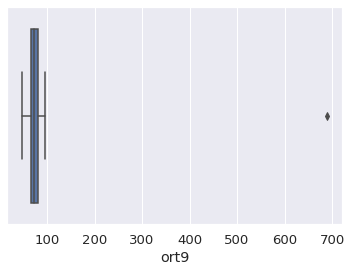

In [ ]:
sns.boxplot(x = df.ort9)

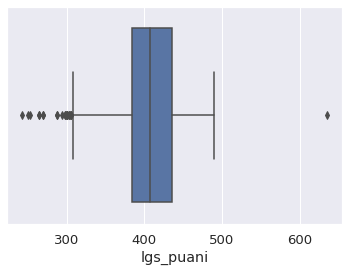

In [ ]:
sns.boxplot(x = df.lgs_puani)

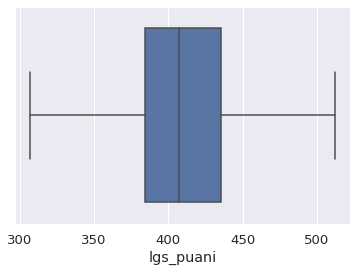

In [ ]:
Q1 = df.lgs_puani.quantile(0.25)
Q3 = df.lgs_puani.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["lgs_puani"] > upper,"lgs_puani"] = upper
df.loc[df["lgs_puani"] < lower,"lgs_puani"] = lower
sns.boxplot(x = df.lgs_puani)

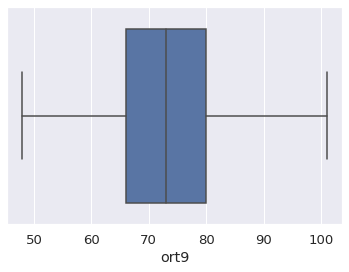

In [ ]:
Q1 = df.ort9.quantile(0.25)
Q3 = df.ort9.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["ort9"] > upper,"ort9"] = upper

sns.boxplot(x = df.ort9)

#Feature Selection

In [ ]:
x = df #degiskenler
y = df.ort11 #tahmin edilecek

In [ ]:
x.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,1,1,1,1,1,1,4,4,0,2,3,3,0,0,3,5,1,2,4,2,1,0,0,0,1,1,377.0,93,56,55,68.0,70,74
1,0,1,1,1,1,1,1,2,6,0,1,3,2,1,0,3,4,1,3,2,2,0,0,0,0,0,0,393.0,80,58,48,67.0,71,74
2,0,1,1,1,1,1,1,3,4,0,2,3,3,1,0,3,1,2,2,2,3,0,1,0,0,1,0,390.0,90,81,87,83.0,86,40
3,0,1,1,1,1,1,1,7,4,1,1,3,2,1,0,2,5,1,1,1,2,0,0,1,1,1,1,378.0,80,51,33,63.0,61,62
4,0,1,0,1,1,0,1,2,4,1,0,2,2,1,1,3,5,1,2,1,1,1,0,0,0,1,0,394.0,86,72,58,69.0,70,77


In [ ]:
x.corr()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
cinsiyet,1.000000,-0.007505,0.032542,0.021516,0.037302,0.055871,0.018833,0.036943,0.054139,-0.003283,-0.061753,0.110517,-0.016143,0.012113,0.018415,0.075166,0.097428,-0.141227,-0.099004,0.425190,-0.260115,0.022384,-0.023365,0.287557,-0.030784,-0.064453,0.030900,-0.012434,-0.064464,-0.201619,-0.071236,-0.134355,-0.172304,-0.206806
Asag,-0.007505,1.000000,-0.014296,-0.002620,-0.004542,0.174092,0.196902,-0.000757,0.023166,0.046563,-0.056944,0.091017,0.044746,0.065546,-0.012764,0.073094,-0.010094,0.049382,0.000447,0.000215,0.008107,0.035309,0.049660,-0.037073,0.011205,0.009766,-0.032078,0.034533,0.024031,0.048201,0.035879,0.088913,0.064485,0.062366
Bsag,0.032542,-0.014296,1.000000,-0.005038,0.100091,0.205177,-0.017541,0.040723,0.054196,-0.193122,0.206124,0.125259,0.032068,0.047037,0.008958,-0.048806,0.039960,-0.034330,-0.043638,0.052087,-0.029667,-0.021102,0.002951,0.023049,0.021544,-0.009989,0.011444,0.020835,0.021824,0.003707,-0.018508,0.002720,-0.006954,-0.022760
Aoz,0.021516,-0.002620,-0.005038,1.000000,-0.001601,0.103515,-0.003215,0.021429,0.033815,-0.043684,0.065759,0.048811,-0.006297,-0.015071,0.009199,-0.009930,-0.046982,-0.072224,-0.034737,-0.036818,-0.027210,0.027702,0.017501,-0.036206,0.003949,0.034023,0.011558,0.019523,0.054421,-0.029086,0.001369,0.022448,0.040533,0.018667
Boz,0.037302,-0.004542,0.100091,-0.001601,1.000000,0.179458,-0.005574,-0.046433,0.028977,-0.041006,0.005790,0.007252,-0.010916,0.062103,0.015948,-0.017215,0.025619,0.012905,-0.024373,0.011976,0.004953,0.048025,-0.010263,0.008553,0.006846,-0.011705,0.020037,-0.020457,-0.015454,-0.014696,0.006628,-0.000295,-0.032221,-0.036531
ABayri,0.055871,0.174092,0.205177,0.103515,0.179458,1.000000,0.164681,-0.134179,0.001069,-0.259999,0.102381,0.119615,0.137464,0.025916,0.002703,0.054812,0.017016,0.042508,-0.001093,0.009019,-0.009553,0.055076,0.019105,0.003760,0.011434,0.046990,-0.032163,0.001324,-0.000430,0.031275,0.029972,0.024492,0.013365,-0.023817
Abirlikte,0.018833,0.196902,-0.017541,-0.003215,-0.005574,0.164681,1.000000,0.015857,0.035868,0.022262,0.011629,0.022333,0.029295,0.058277,-0.095148,0.073121,-0.035905,0.006105,-0.057950,0.005021,-0.033672,-0.027511,0.040548,0.052988,0.013748,-0.005763,-0.039361,0.011007,0.012109,0.018782,0.014914,0.051910,0.036522,0.011956
Aogrenim,0.036943,-0.000757,0.040723,0.021429,-0.046433,-0.134179,0.015857,1.000000,0.442155,0.240936,0.001867,0.247039,-0.132763,0.124710,0.020868,0.020853,0.093012,-0.152360,-0.017658,0.073474,0.040580,-0.071370,0.174614,0.096541,0.162641,0.064187,0.173148,0.079010,0.054823,0.033807,0.019255,0.065294,0.050199,0.023732
Bogrenim,0.054139,0.023166,0.054196,0.033815,0.028977,0.001069,0.035868,0.442155,1.000000,0.062823,0.040856,0.363772,-0.104172,0.109771,0.019764,-0.015376,0.068176,-0.131442,-0.021164,0.040618,0.121913,-0.030637,0.198194,0.090802,0.160098,0.036186,0.172016,0.169441,0.145077,0.037776,0.084751,0.103436,0.107250,0.068782
Acalisma,-0.003283,0.046563,-0.193122,-0.043684,-0.041006,-0.259999,0.022262,0.240936,0.062823,1.000000,-0.119312,0.137336,-0.145989,-0.007171,-0.012162,0.023903,0.057655,-0.009977,-0.008383,0.047878,0.023240,-0.026921,0.098174,0.091391,0.044041,0.019620,0.102069,0.031300,0.036483,-0.036185,-0.026977,-0.018707,-0.037447,-0.003762


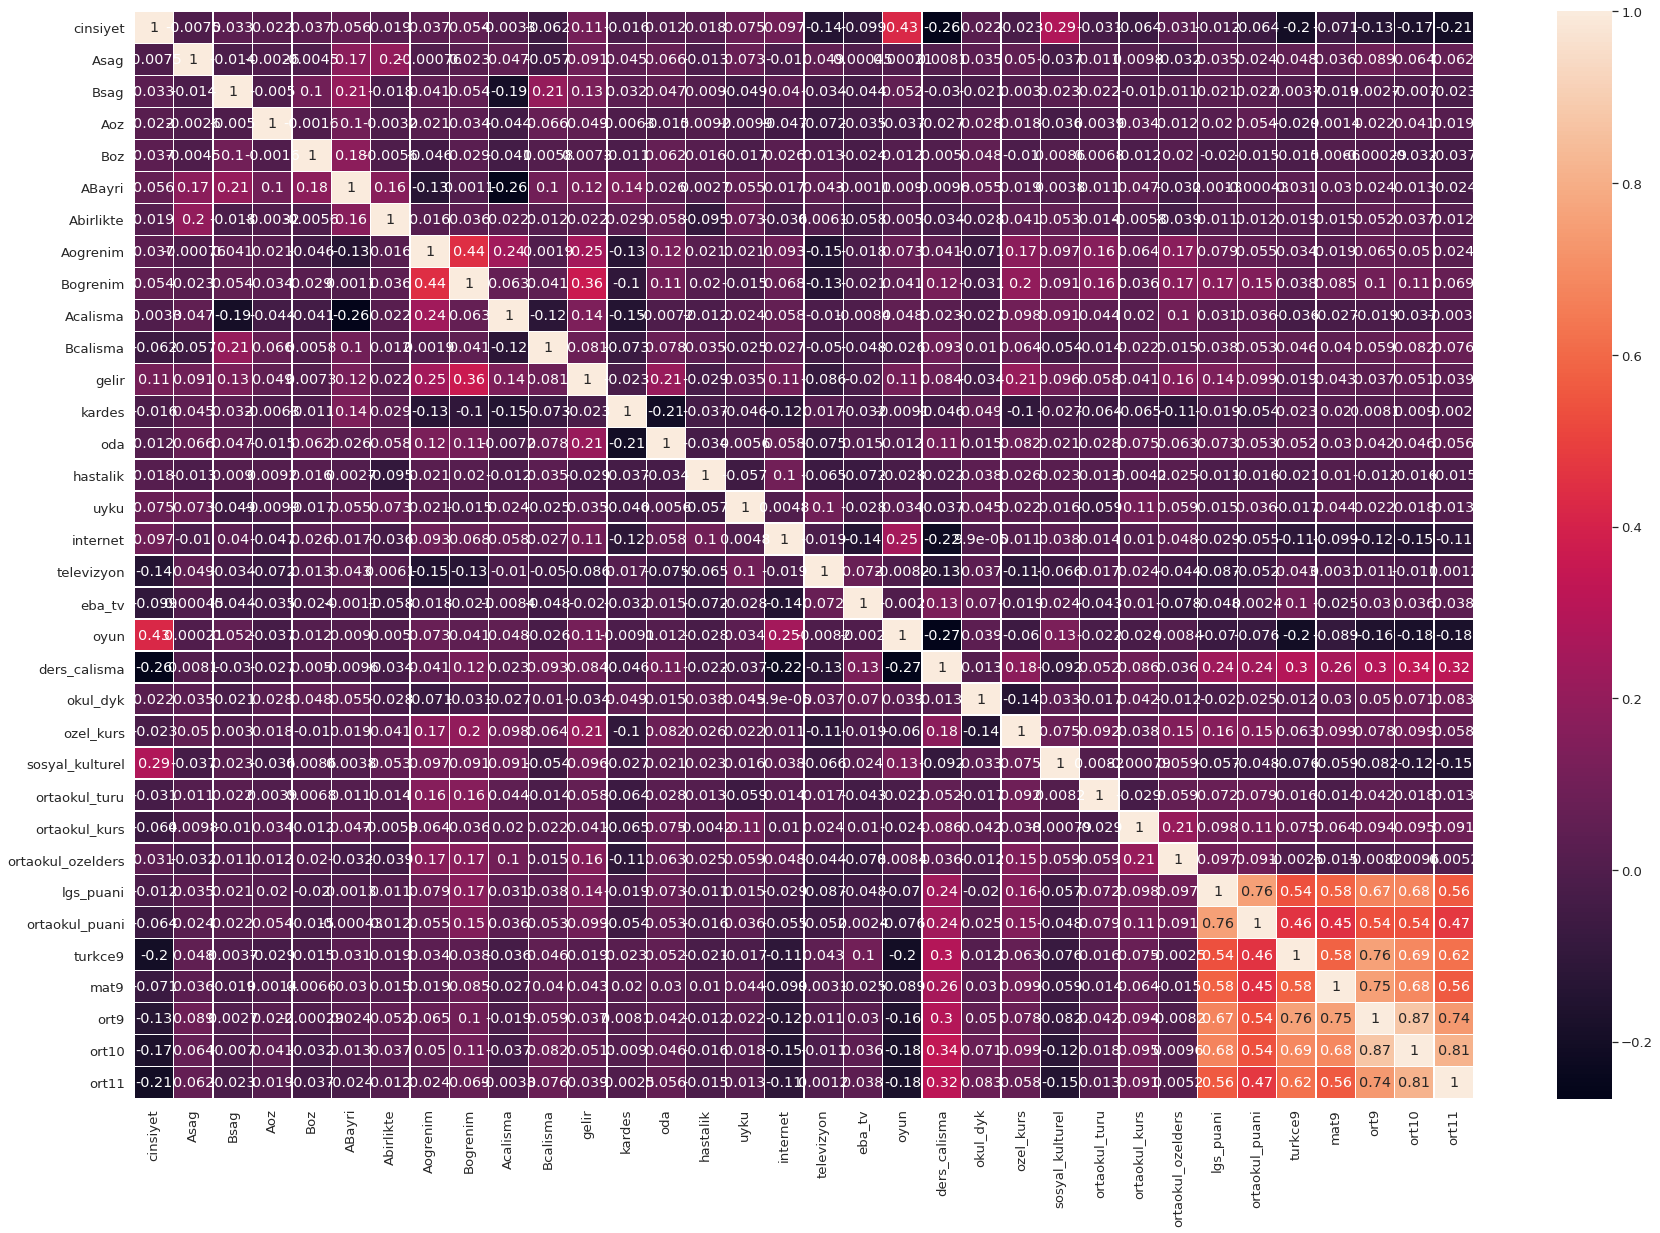

In [ ]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(df.corr(), annot=True, linewidths=0.3, ax=ax)
plt.savefig("AnadoluLiseleri/anadolu_heatmap.png")

In [ ]:
df_kadin = x["cinsiyet"] == 1
x_kadin = x[df_kadin]

df_erkek = x["cinsiyet"] == 0
x_erkek = x[df_erkek]

kadin_desc = x_kadin.describe().T
erkek_desc = x_erkek.describe().T

pd.concat([kadin_desc, erkek_desc], axis=1)

,count,mean,std,min,25%,50%,75%,max,count,mean,std,min,25%,50%,75%,max
cinsiyet,362.0,1.000000,0.000000,1.000,1.00,1.0,1.00,1.0,722.0,0.000000,0.000000,0.000,0.0,0.0,0.0,0.000
Asag,362.0,0.991713,0.090782,0.000,1.00,1.0,1.00,1.0,722.0,0.993075,0.082987,0.000,1.0,1.0,1.0,1.000
Bsag,362.0,0.980663,0.137897,0.000,1.00,1.0,1.00,1.0,722.0,0.969529,0.171998,0.000,1.0,1.0,1.0,1.000
Aoz,362.0,1.000000,0.000000,1.000,1.00,1.0,1.00,1.0,722.0,0.998615,0.037216,0.000,1.0,1.0,1.0,1.000
Boz,362.0,1.000000,0.000000,1.000,1.00,1.0,1.00,1.0,722.0,0.995845,0.064371,0.000,1.0,1.0,1.0,1.000
ABayri,362.0,0.941989,0.234088,0.000,1.00,1.0,1.00,1.0,722.0,0.909972,0.286420,0.000,1.0,1.0,1.0,1.000
Abirlikte,362.0,0.991713,0.090782,0.000,1.00,1.0,1.00,1.0,722.0,0.987535,0.111027,0.000,1.0,1.0,1.0,1.000
Aogrenim,362.0,2.795580,1.120043,1.000,2.00,2.0,3.00,7.0,722.0,2.713296,1.014221,1.000,2.0,2.0,3.0,7.000
Bogrenim,362.0,3.408840,1.271346,1.000,2.00,3.0,4.00,7.0,722.0,3.272853,1.137708,1.000,2.0,3.0,4.0,7.000
Acalisma,362.0,0.270718,0.514256,0.000,0.00,0.0,0.00,2.0,722.0,0.274238,0.502008,0.000,0.0,0.0,0.0,2.000


In [ ]:
x_reduced_col_names = x.corr().abs()["ort11"].nlargest(10).index
x[x_reduced_col_names].corr()

,ort11,ort10,ort9,turkce9,mat9,lgs_puani,ortaokul_puani,ders_calisma,cinsiyet,oyun
ort11,1.000000,0.812049,0.735094,0.620896,0.564581,0.562413,0.470903,0.318021,-0.206806,-0.176105
ort10,0.812049,1.000000,0.872666,0.685016,0.683687,0.677415,0.536872,0.335561,-0.172304,-0.177935
ort9,0.735094,0.872666,1.000000,0.760162,0.754847,0.674373,0.538464,0.295102,-0.134355,-0.161761
turkce9,0.620896,0.685016,0.760162,1.000000,0.582684,0.535370,0.457950,0.297209,-0.201619,-0.203641
mat9,0.564581,0.683687,0.754847,0.582684,1.000000,0.579721,0.446324,0.256546,-0.071236,-0.088728
lgs_puani,0.562413,0.677415,0.674373,0.535370,0.579721,1.000000,0.755105,0.235224,-0.012434,-0.069941
ortaokul_puani,0.470903,0.536872,0.538464,0.457950,0.446324,0.755105,1.000000,0.240453,-0.064464,-0.076150
ders_calisma,0.318021,0.335561,0.295102,0.297209,0.256546,0.235224,0.240453,1.000000,-0.260115,-0.266336
cinsiyet,-0.206806,-0.172304,-0.134355,-0.201619,-0.071236,-0.012434,-0.064464,-0.260115,1.000000,0.425190
oyun,-0.176105,-0.177935,-0.161761,-0.203641,-0.088728,-0.069941,-0.076150,-0.266336,0.425190,1.000000


In [ ]:
x = x[x_reduced_col_names]
x.dtypes

ort11               int64
ort10               int64
ort9              float64
turkce9             int64
mat9                int64
lgs_puani         float64
ortaokul_puani      int64
ders_calisma        int64
cinsiyet            int64
oyun                int64
dtype: object

9. sınıf türkçe ve matematik derslerinin not ortalamaları ile 11. sınıf not ortalaması yüksek korelasyonlu çıkmıştır.

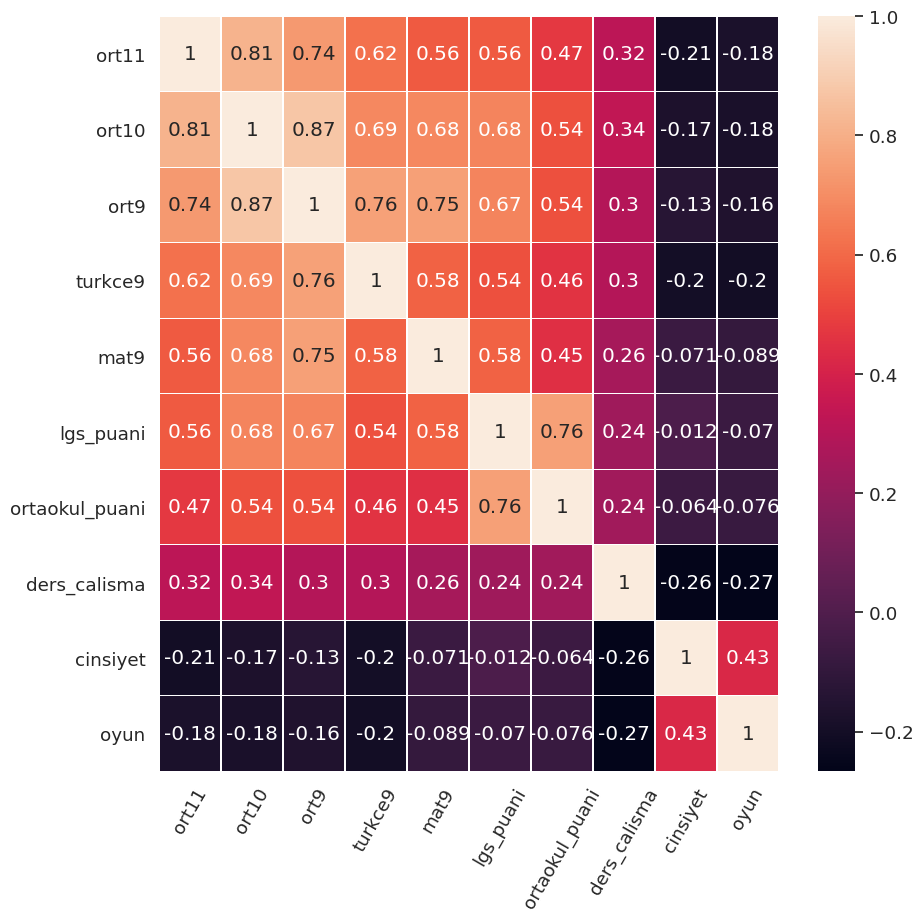

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100) 
sns.set(font_scale=1.2)
sns.heatmap(x[x_reduced_col_names].corr(), annot=True, linewidths=0.3, ax=ax)
plt.xticks(rotation=60)
plt.savefig("AnadoluLiseleri/anadolu_reduced_heatmap.png")

#Split Data

In [ ]:
x = x.drop("ort11", axis=1)
y = df.ort11

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=42)

# Specify and Fit the Model

##Decision Tree Regressor

In [ ]:
model = DecisionTreeRegressor(max_depth=2, 
                              min_samples_split=0.1, 
                              min_samples_leaf=0.1,
                              max_features="auto") #max_depth=2

model.fit(train_x, train_y)

val_predictions = model.predict(val_x)

print("Eğitim doğruluğu: ", model.score(train_x, train_y)*100)
print("Test doğruluğu: ", model.score(val_x, val_y)*100)

val_mae = mean_absolute_error(val_y, val_predictions)

print(val_mae)

Eğitim doğruluğu:  62.84883264334397
Test doğruluğu:  57.43611581699908
5.743584436439603


In [ ]:
pred = val_predictions[-10:].astype("int64")
org = val_y[-10:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,78,75
1,78,74
2,61,50
3,78,86
4,78,80
5,78,84
6,61,65
7,71,73
8,71,71
9,71,77


## XGBoost

In [ ]:
XGB_model = XGBRegressor()

XGB_model.fit(train_x, train_y)

predictions = XGB_model.predict(val_x)
print('Eğitim doğruluğu :',XGB_model.score(train_x,train_y)*100)
print('Test doğruluğu :',XGB_model.score(val_x,val_y)*100)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

[23:34:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Eğitim doğruluğu : 79.64580154505221
Test doğruluğu : 63.77607353619905
Mean Absolute Error: 5.263230341386971


## Parameter Tuning

In [ ]:
XGB_model = XGBRegressor(min_child_weight=6,
                         max_depth=5,
                         subsample=0.6,
                         colsample_bytree=0.6,
                         n_estimators=500,
                         objective="reg:squarederror"
                         )
XGB_model.fit(train_x, train_y,
              early_stopping_rounds = 5,
              eval_set=[(val_x, val_y)],
              
              verbose=False)

predictions = XGB_model.predict(val_x)

print('Eğitim doğruluğu :',XGB_model.score(train_x,train_y)*100)
print('Test doğruluğu :',XGB_model.score(val_x,val_y)*100)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Eğitim doğruluğu : 78.84274192263344
Test doğruluğu : 65.01979226095219
Mean Absolute Error: 5.241982350930076


In [ ]:
val_predictions = XGB_model.predict(val_x)

pred = val_predictions[-10:].astype("int64")
org = val_y[-10:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,72,75
1,79,74
2,55,50
3,78,86
4,65,80
5,77,84
6,62,65
7,74,73
8,71,71
9,73,77


---

# Classification

In [ ]:
data_file = "Data/Veriseti_Anadolu_Liseleri.xlsx"
data_original = pd.read_excel(data_file)
df = data_original.copy()
df = df.drop(columns=["okuladi", "okulno"])
df.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,0,0,0,0,0,0,4,4,1,2,3,3,1,1,3,5,1,2,4,2,0,1,0,0,0,0,377.000000,93.4088,56.45,55.63,68.43,70.77,74.38
1,0,0,0,0,0,0,0,2,6,1,0,3,2,0,1,3,4,1,3,2,2,1,1,0,0,1,1,393.000000,80.0000,58.63,48.63,67.78,71.45,74.89
2,0,0,0,0,0,0,0,3,4,1,2,3,3,0,1,3,1,2,2,2,3,1,0,0,0,0,1,390.000000,90.0000,81.13,87.25,83.29,86.07,40.46
3,0,0,0,0,0,0,0,7,4,0,0,3,2,0,1,2,5,1,1,1,2,1,1,1,1,0,0,378.000000,80.0000,51.38,33.13,63.78,61.94,62.92
4,0,0,1,0,0,1,0,2,4,0,1,2,2,0,0,3,5,1,2,1,1,0,1,0,0,0,1,394.601327,86.0000,72.25,58.75,69.24,70.90,77.12


In [ ]:
def sifir_bir_duzelt(degisken):
  for i in df[degisken].index:
    if df[degisken][i] ==0:
      df[degisken][i] = 1
    elif df[degisken][i]==1:
      df[degisken][i]=0

In [ ]:
sifir_bir_duzelt("Asag")
sifir_bir_duzelt("Bsag")
sifir_bir_duzelt("Aoz")
sifir_bir_duzelt("Boz")
sifir_bir_duzelt("ABayri")
sifir_bir_duzelt("Abirlikte")
sifir_bir_duzelt("Acalisma")
sifir_bir_duzelt("Bcalisma")
sifir_bir_duzelt("oda")
sifir_bir_duzelt("hastalik")
sifir_bir_duzelt("okul_dyk")
sifir_bir_duzelt("ozel_kurs")
sifir_bir_duzelt("ortaokul_kurs")
sifir_bir_duzelt("ortaokul_ozelders")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Aykırı Değer Tespiti

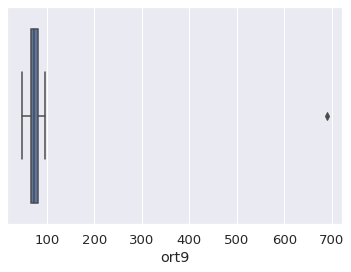

In [ ]:
sns.boxplot(x = df.ort9)

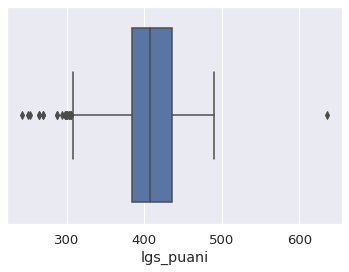

In [ ]:
sns.boxplot(x = df.lgs_puani)

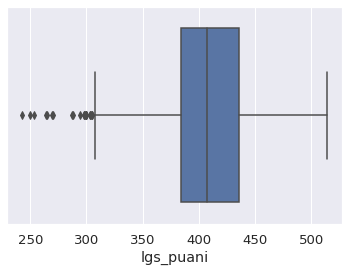

In [ ]:
Q1 = df.lgs_puani.quantile(0.25)
Q3 = df.lgs_puani.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["lgs_puani"] > upper,"lgs_puani"] = upper

sns.boxplot(x = df.lgs_puani)

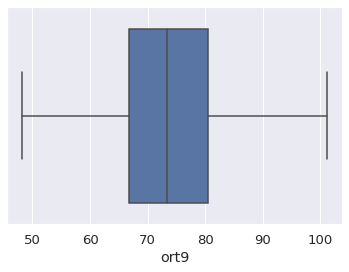

In [ ]:
Q1 = df.ort9.quantile(0.25)
Q3 = df.ort9.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["ort9"] > upper,"ort9"] = upper

sns.boxplot(x = df.ort9)

In [ ]:
#df.iloc[:, -7:] = df.iloc[:, -7:].astype("int64")
#df

In [ ]:
def puan_olcegi(ort):
  for i in df[ort].index:
    #if df[ort][i] >=0 and df[ort][i] <= 49,99:
     # df[ort][i] = 0
    if df[ort][i] >=0 and df[ort][i] <= 49.99:
      df[ort][i] = 1
    elif df[ort][i] >= 50 and df[ort][i] <=59.99:
      df[ort][i] = 2
    elif df[ort][i] >= 60 and df[ort][i] <=69.99:
      df[ort][i] = 3
    elif df[ort][i] >= 70 and df[ort][i] <=84.99:
      df[ort][i] = 4
    elif df[ort][i] >= 85 and df[ort][i] <=100:
      df[ort][i] = 5

In [ ]:
puan_olcegi(ort = "ort9")
puan_olcegi(ort = "ort10")
puan_olcegi(ort = "ort11")
puan_olcegi(ort = "turkce9")
puan_olcegi(ort = "mat9")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-p

In [ ]:
df.iloc[:, -7:] = df.iloc[:, -7:].astype("int64")
df

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,1,1,1,1,1,1,4,4,0,2,3,3,0,0,3,5,1,2,4,2,1,0,0,0,1,1,377,93,2,2,3,4,4
1,0,1,1,1,1,1,1,2,6,0,1,3,2,1,0,3,4,1,3,2,2,0,0,0,0,0,0,393,80,2,1,3,4,4
2,0,1,1,1,1,1,1,3,4,0,2,3,3,1,0,3,1,2,2,2,3,0,1,0,0,1,0,390,90,4,5,4,5,1
3,0,1,1,1,1,1,1,7,4,1,1,3,2,1,0,2,5,1,1,1,2,0,0,1,1,1,1,378,80,2,1,3,3,3
4,0,1,0,1,1,0,1,2,4,1,0,2,2,1,1,3,5,1,2,1,1,1,0,0,0,1,0,394,86,4,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,0,1,1,1,1,1,1,3,4,1,1,3,3,0,0,0,3,3,1,2,3,1,0,0,0,0,0,439,95,5,4,4,4,4
1080,0,1,1,1,1,1,1,5,6,0,1,4,3,0,0,3,2,2,2,2,3,0,1,1,0,0,0,426,91,4,4,4,4,4
1081,1,1,1,1,1,1,1,3,3,0,2,1,2,1,0,3,1,2,2,1,3,0,0,1,0,1,1,410,93,4,4,4,4,4
1082,0,1,1,1,1,1,1,3,4,0,1,2,3,0,0,2,3,1,2,1,2,0,0,0,0,0,0,407,95,3,3,4,4,4


##Feature Selection

In [ ]:
x_cl = df #degiskenler
y_cl = df.ort11 #tahmin edilecek

In [ ]:
x_cl.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,1,1,1,1,1,1,4,4,0,2,3,3,0,0,3,5,1,2,4,2,1,0,0,0,1,1,377,93,2,2,3,4,4
1,0,1,1,1,1,1,1,2,6,0,1,3,2,1,0,3,4,1,3,2,2,0,0,0,0,0,0,393,80,2,1,3,4,4
2,0,1,1,1,1,1,1,3,4,0,2,3,3,1,0,3,1,2,2,2,3,0,1,0,0,1,0,390,90,4,5,4,5,1
3,0,1,1,1,1,1,1,7,4,1,1,3,2,1,0,2,5,1,1,1,2,0,0,1,1,1,1,378,80,2,1,3,3,3
4,0,1,0,1,1,0,1,2,4,1,0,2,2,1,1,3,5,1,2,1,1,1,0,0,0,1,0,394,86,4,2,3,4,4


In [ ]:
x_cl.corr()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
cinsiyet,1.000000,-0.007505,0.032542,0.021516,0.037302,0.055871,0.018833,0.036943,0.054139,-0.003283,-0.061753,0.110517,-0.016143,0.012113,0.018415,0.075166,0.097428,-0.141227,-0.099004,0.425190,-0.260115,0.022384,-0.023365,0.287557,-0.030784,-0.064453,0.030900,-0.011509,-0.064464,-0.185144,-0.059783,-0.053137,-0.159471,-0.131763
Asag,-0.007505,1.000000,-0.014296,-0.002620,-0.004542,0.174092,0.196902,-0.000757,0.023166,0.046563,-0.056944,0.091017,0.044746,0.065546,-0.012764,0.073094,-0.010094,0.049382,0.000447,0.000215,0.008107,0.035309,0.049660,-0.037073,0.011205,0.009766,-0.032078,0.032575,0.024031,0.034104,0.031642,0.028448,0.080687,0.043710
Bsag,0.032542,-0.014296,1.000000,-0.005038,0.100091,0.205177,-0.017541,0.040723,0.054196,-0.193122,0.206124,0.125259,0.032068,0.047037,0.008958,-0.048806,0.039960,-0.034330,-0.043638,0.052087,-0.029667,-0.021102,0.002951,0.023049,0.021544,-0.009989,0.011444,0.026424,0.021824,-0.000197,-0.024388,0.007552,-0.018704,-0.002656
Aoz,0.021516,-0.002620,-0.005038,1.000000,-0.001601,0.103515,-0.003215,0.021429,0.033815,-0.043684,0.065759,0.048811,-0.006297,-0.015071,0.009199,-0.009930,-0.046982,-0.072224,-0.034737,-0.036818,-0.027210,0.027702,0.017501,-0.036206,0.003949,0.034023,0.011558,0.018608,0.054421,-0.019132,-0.006052,0.007544,0.053867,0.013156
Boz,0.037302,-0.004542,0.100091,-0.001601,1.000000,0.179458,-0.005574,-0.046433,0.028977,-0.041006,0.005790,0.007252,-0.010916,0.062103,0.015948,-0.017215,0.025619,0.012905,-0.024373,0.011976,0.004953,0.048025,-0.010263,0.008553,0.006846,-0.011705,0.020037,-0.020382,-0.015454,-0.017168,0.002763,0.001608,-0.024187,-0.018762
ABayri,0.055871,0.174092,0.205177,0.103515,0.179458,1.000000,0.164681,-0.134179,0.001069,-0.259999,0.102381,0.119615,0.137464,0.025916,0.002703,0.054812,0.017016,0.042508,-0.001093,0.009019,-0.009553,0.055076,0.019105,0.003760,0.011434,0.046990,-0.032163,0.008302,-0.000430,0.039121,0.026564,0.017138,0.036629,0.005885
Abirlikte,0.018833,0.196902,-0.017541,-0.003215,-0.005574,0.164681,1.000000,0.015857,0.035868,0.022262,0.011629,0.022333,0.029295,0.058277,-0.095148,0.073121,-0.035905,0.006105,-0.057950,0.005021,-0.033672,-0.027511,0.040548,0.052988,0.013748,-0.005763,-0.039361,0.009564,0.012109,0.005692,0.012205,0.014749,0.039972,0.024935
Aogrenim,0.036943,-0.000757,0.040723,0.021429,-0.046433,-0.134179,0.015857,1.000000,0.442155,0.240936,0.001867,0.247039,-0.132763,0.124710,0.020868,0.020853,0.093012,-0.152360,-0.017658,0.073474,0.040580,-0.071370,0.174614,0.096541,0.162641,0.064187,0.173148,0.079307,0.054823,0.024680,0.029738,0.075035,0.024878,0.019004
Bogrenim,0.054139,0.023166,0.054196,0.033815,0.028977,0.001069,0.035868,0.442155,1.000000,0.062823,0.040856,0.363772,-0.104172,0.109771,0.019764,-0.015376,0.068176,-0.131442,-0.021164,0.040618,0.121913,-0.030637,0.198194,0.090802,0.160098,0.036186,0.172016,0.169600,0.145077,0.040009,0.090537,0.038088,0.105103,0.056971
Acalisma,-0.003283,0.046563,-0.193122,-0.043684,-0.041006,-0.259999,0.022262,0.240936,0.062823,1.000000,-0.119312,0.137336,-0.145989,-0.007171,-0.012162,0.023903,0.057655,-0.009977,-0.008383,0.047878,0.023240,-0.026921,0.098174,0.091391,0.044041,0.019620,0.102069,0.029563,0.036483,-0.040689,-0.021901,-0.021453,-0.065582,0.032889


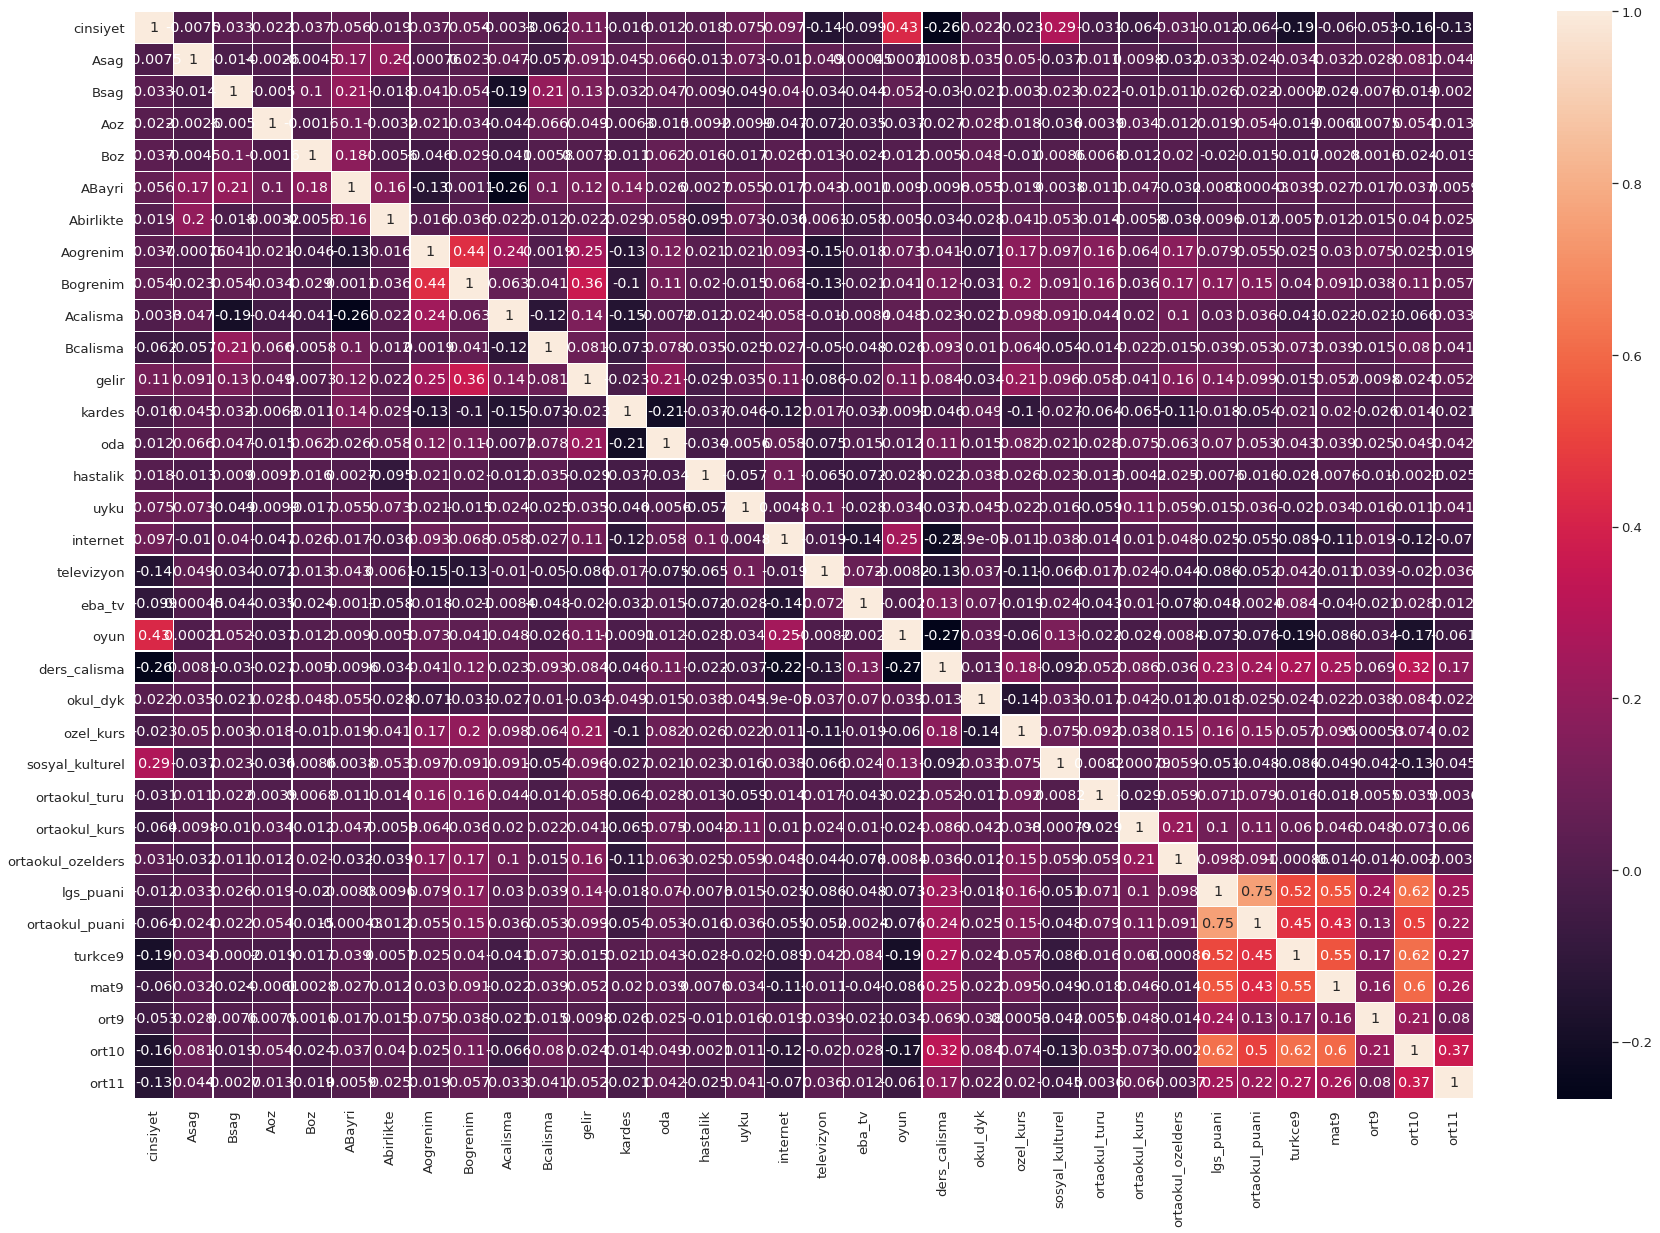

In [ ]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(df.corr(), annot=True, linewidths=0.3, ax=ax)
plt.savefig("AnadoluLiseleri/anadolu_heatmap_classification.png")

In [ ]:
x_cl.corr().abs()["ort11"].nlargest(10)

ort11             1.000000
ort10             0.365714
turkce9           0.269114
mat9              0.256011
lgs_puani         0.246551
ortaokul_puani    0.222418
ders_calisma      0.174839
cinsiyet          0.131763
ort9              0.080279
internet          0.069624
Name: ort11, dtype: float64

In [ ]:
x_cl_reduced_col_names = x_cl.corr().abs()["ort11"].nlargest(10).index
x_cl[x_cl_reduced_col_names].corr()

,ort11,ort10,turkce9,mat9,lgs_puani,ortaokul_puani,ders_calisma,cinsiyet,ort9,internet
ort11,1.000000,0.365714,0.269114,0.256011,0.246551,0.222418,0.174839,-0.131763,0.080279,-0.069624
ort10,0.365714,1.000000,0.618027,0.600915,0.621359,0.495947,0.318186,-0.159471,0.212841,-0.115143
turkce9,0.269114,0.618027,1.000000,0.549109,0.519664,0.451844,0.274623,-0.185144,0.167577,-0.089325
mat9,0.256011,0.600915,0.549109,1.000000,0.551268,0.429739,0.247471,-0.059783,0.158839,-0.108892
lgs_puani,0.246551,0.621359,0.519664,0.551268,1.000000,0.752741,0.233774,-0.011509,0.238957,-0.025432
ortaokul_puani,0.222418,0.495947,0.451844,0.429739,0.752741,1.000000,0.240453,-0.064464,0.126210,-0.055486
ders_calisma,0.174839,0.318186,0.274623,0.247471,0.233774,0.240453,1.000000,-0.260115,0.068780,-0.220571
cinsiyet,-0.131763,-0.159471,-0.185144,-0.059783,-0.011509,-0.064464,-0.260115,1.000000,-0.053137,0.097428
ort9,0.080279,0.212841,0.167577,0.158839,0.238957,0.126210,0.068780,-0.053137,1.000000,0.018731
internet,-0.069624,-0.115143,-0.089325,-0.108892,-0.025432,-0.055486,-0.220571,0.097428,0.018731,1.000000


In [ ]:
x_cl = x_cl[x_cl_reduced_col_names]
x_cl.dtypes

ort11             int64
ort10             int64
turkce9           int64
mat9              int64
lgs_puani         int64
ortaokul_puani    int64
ders_calisma      int64
cinsiyet          int64
ort9              int64
internet          int64
dtype: object

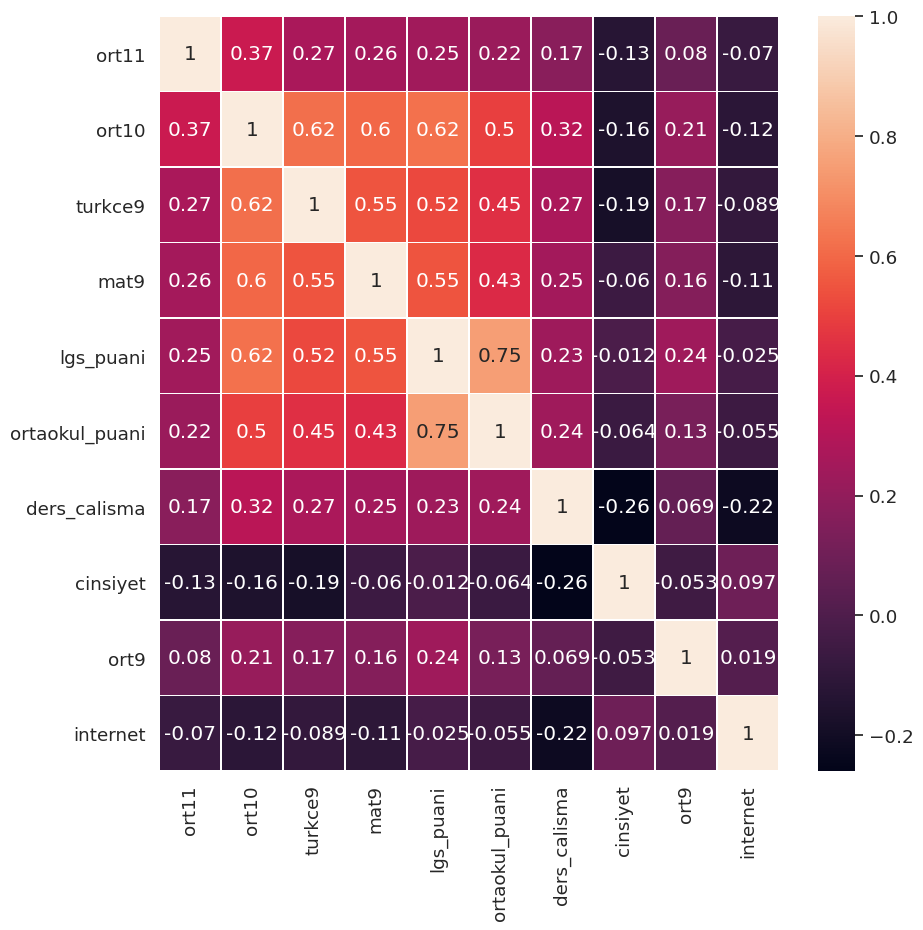

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), dpi=100) 
sns.heatmap(x_cl[x_cl_reduced_col_names].corr(), annot=True, linewidths=0.3, ax=ax)
plt.savefig("AnadoluLiseleri/anadolu_reduced_cl_heatmap.png")

## Split Data

In [ ]:
x_cl = x_cl.drop("ort11", axis=1)
y_cl = df.ort11

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x_cl, y_cl, random_state=42)

##Specify and Fit the Model

### Multinomial Logistic Regression

Üç veya daha fazla kategoriye sahip verileri sınıflandırmak için kullanılan bir Logistic Regression yöntemidir.

In [ ]:
ort_logistic = LogisticRegression()

ort_logistic.fit(train_x, train_y)

base_model_predicts = ort_logistic.predict(val_x)
print('Accuracy from base model train data : {0}'.format(ort_logistic.score(train_x, train_y)))
print('Accuracy from base model test data: {0}'.format(ort_logistic.score(val_x, val_y)))

Accuracy from base model train data : 0.5473554735547356
Accuracy from base model test data: 0.47232472324723246


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
custom_ort_logistic = LogisticRegression( penalty = "l2", C=100)

custom_ort_logistic.fit(train_x,train_y)

custom_model_predicts = custom_ort_logistic.predict(val_x)
print('Accuracy from base model train data : {0}'.format(custom_ort_logistic.score(train_x, train_y)))
print('Accuracy from base model test data: {0}'.format(custom_ort_logistic.score(val_x, val_y)))

Accuracy from base model train data : 0.5510455104551045
Accuracy from base model test data: 0.47232472324723246


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


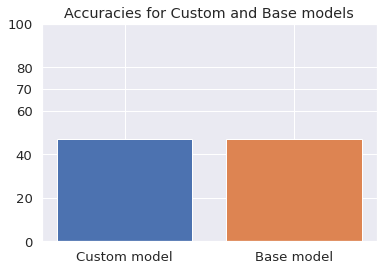

In [ ]:
base_model_accuracy = ort_logistic.score(val_x,val_y)*100
custom_model_accuracy = custom_ort_logistic.score(val_x,val_y)*100

plt.bar("Custom model",custom_model_accuracy)
plt.bar("Base model",base_model_accuracy)
plt.yticks([0,20,40,60,70,80,100])
plt.title('Accuracies for Custom and Base models')
plt.show()

###K-Nearest Neighbor Algorithm (KNN)

In [ ]:
ort_knn = KNeighborsClassifier(n_neighbors = 10) #K komşu sayısı

ort_knn.fit(train_x,train_y) #Modelimizi eğitim verilerine göre eğittik.

knn_test_values = ort_knn.predict(val_x) #Tahmin edilen KNN değerleri için değişkenlerden yararlanıyoruz.
#Bu değerleri test verilerimizin etiketleriyle, yani gerçek sonuçlarla, karşılaştıracağız
#ve başarı oranımızı göreceğiz.
true_predicts = 0
import numpy
valy = numpy.array(val_y)
for i in range(len(val_y)):
    if(valy[i] == knn_test_values[i]):
        true_predicts += 1


print("Test Variables Size : ",len(valy))
#Şimdi, başarı oranını yüzde cinsinden hesaplayalım.
#Toplam test verisi sayısı 30

knn_accuracy = 100*true_predicts/len(valy)
print("KNN Accuracy for ort dataset : %",knn_accuracy)

Test Variables Size :  271
KNN Accuracy for ort dataset : % 43.17343173431734


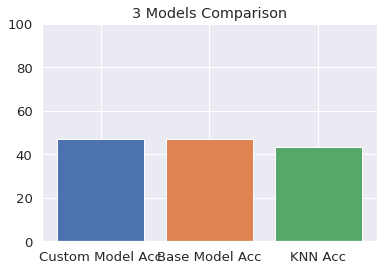

In [ ]:
plt.bar("Custom Model Acc",custom_model_accuracy)
plt.bar("Base Model Acc",base_model_accuracy)
plt.bar("KNN Acc",knn_accuracy)
plt.yticks([0,20,40,60,80,100]) #y ekseninde görmek istediğimiz rakamlar
plt.title("3 Models Comparison")

plt.show()

### Support Vector Machine (SVM)

In [ ]:
ort_svm = svm.SVC(kernel = "poly")
ort_svm.fit(train_x,train_y)

svm_predict = ort_svm.predict(val_x)

svm_accuracy = accuracy_score(valy,svm_predict)
svm_accuracy = svm_accuracy*100
print("SVM Accuracy for ort dataset : %",svm_accuracy)

SVM Accuracy for ort dataset : % 41.69741697416974


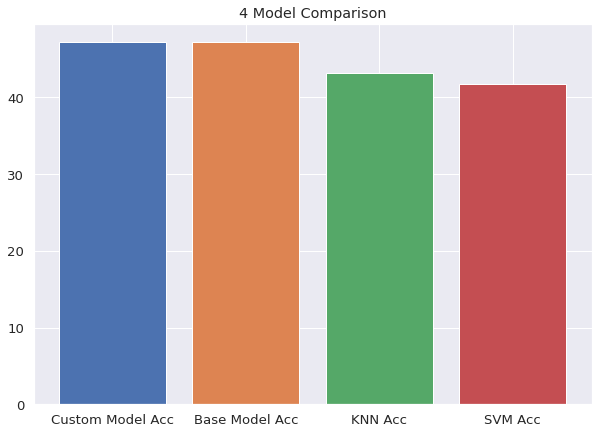

In [ ]:
plt.figure(figsize =(10,7))
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('SVM Acc',svm_accuracy)
plt.title("4 Model Comparison")


plt.show()

### Random Forest Classifier

In [ ]:
ort_randomforest = RandomForestClassifier(n_estimators = 600,
                                          max_features = "sqrt",
                                          max_depth = 4,
                                          min_samples_split = 0.27,
                                          min_samples_leaf=4,
                                          random_state=2) 
#n _estimators parametresiyle ormanda bulunmasını istediğimiz karar ağacı sayısını belirliyoruz.

ort_randomforest.fit(train_x,train_y)

randomforest_accuracy = ort_randomforest.score(val_x,val_y)*100
print('Random Forest Accuracy for ort dataset on test data : %',randomforest_accuracy)
print('Random Forest Accuracy for ort dataset on train data : %',ort_randomforest.score(train_x,train_y)*100)

Random Forest Accuracy for ort dataset on test data : % 52.398523985239855
Random Forest Accuracy for ort dataset on train data : % 55.227552275522754


#Confusion Matrix

Confusion matrix, without normalization
[[ 0  0  5  2  0]
 [ 0  0 27  9  0]
 [ 0  0 26 43  0]
 [ 0  0 14 92  7]
 [ 0  0  0 22 24]]


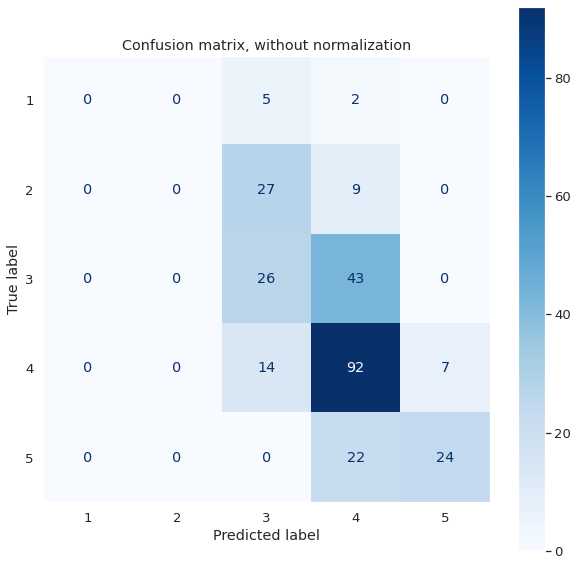

Normalized confusion matrix
[[0.   0.   0.71 0.29 0.  ]
 [0.   0.   0.75 0.25 0.  ]
 [0.   0.   0.38 0.62 0.  ]
 [0.   0.   0.12 0.81 0.06]
 [0.   0.   0.   0.48 0.52]]


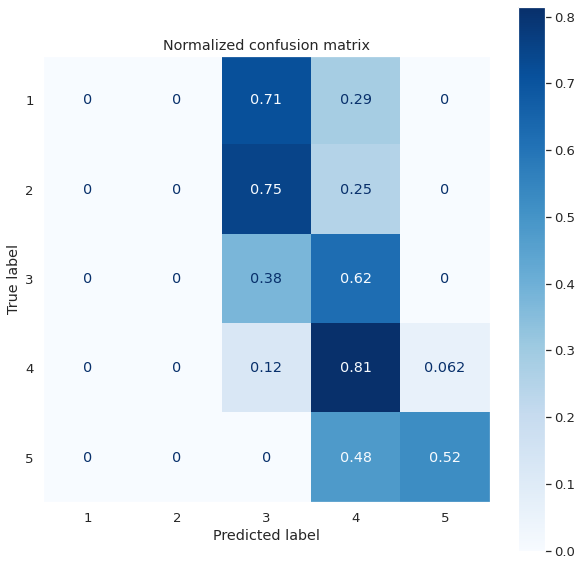

In [ ]:

title1 = "Confusion matrix, without normalization"
title2 = "Normalized confusion matrix"

class_names = ["1", "2", "3", "4", "5"]

np.set_printoptions(precision=2)

fig, ax = plt.subplots(figsize=(10, 10))
#Confusion matrix, without normalization
disp = plot_confusion_matrix(ort_randomforest, val_x, val_y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 values_format = "d",
                                  ax=ax)
disp.ax_.set_title(title1)

plt.grid(False)
    
print(title1)
print(disp.confusion_matrix)


plt.show()

fig, ax2 = plt.subplots(figsize=(10, 10))
#Normalized confusion matrix
disp = plot_confusion_matrix(ort_randomforest, val_x, val_y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize="true",
                                 values_format = ".2g",
                                  ax=ax2)
disp.ax_.set_title(title2)

plt.grid(False)
    
print(title2)
print(disp.confusion_matrix)


plt.show()

In [ ]:
data_file = "Data/Veriseti_Anadolu_Liseleri.xlsx"
data_original = pd.read_excel(data_file)
df100 = data_original.copy()
df100 = df100.drop(columns=["okuladi", "okulno"])
df100.head()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ortaokul_turu,ortaokul_kurs,ortaokul_ozelders,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,0,0,0,0,0,0,0,4,4,1,2,3,3,1,1,3,5,1,2,4,2,0,1,0,0,0,0,377.000000,93.4088,56.45,55.63,68.43,70.77,74.38
1,0,0,0,0,0,0,0,2,6,1,0,3,2,0,1,3,4,1,3,2,2,1,1,0,0,1,1,393.000000,80.0000,58.63,48.63,67.78,71.45,74.89
2,0,0,0,0,0,0,0,3,4,1,2,3,3,0,1,3,1,2,2,2,3,1,0,0,0,0,1,390.000000,90.0000,81.13,87.25,83.29,86.07,40.46
3,0,0,0,0,0,0,0,7,4,0,0,3,2,0,1,2,5,1,1,1,2,1,1,1,1,0,0,378.000000,80.0000,51.38,33.13,63.78,61.94,62.92
4,0,0,1,0,0,1,0,2,4,0,1,2,2,0,0,3,5,1,2,1,1,0,1,0,0,0,1,394.601327,86.0000,72.25,58.75,69.24,70.90,77.12


In [ ]:
not2_index = df.index[df['ort11'] == 2].tolist()

In [ ]:
df100.loc[not2_index].ort11.values

array([57.05, 58.32, 58.07, 54.9 , 59.52, 58.76, 51.22, 57.12, 56.46,
       58.63, 59.87, 59.61, 59.61, 59.25, 50.13, 59.35, 58.88, 59.1 ,
       58.21, 53.6 , 50.13, 57.13, 59.68, 50.37, 56.16, 52.88, 58.52,
       59.28, 58.26, 51.25, 57.44, 52.65, 55.73, 54.22, 59.57, 55.43,
       56.81, 55.96, 54.86, 58.84, 53.77, 57.68, 52.33, 55.2 , 52.36,
       57.87, 59.06, 58.71, 59.67, 54.08, 55.29, 55.5 , 58.35, 56.32,
       58.47, 55.71, 51.03, 54.19, 52.47, 56.17, 56.49, 56.22, 59.57,
       56.7 , 53.51, 55.62, 56.17, 59.4 , 50.18, 52.81, 52.11, 56.62,
       56.86, 59.62, 51.39, 56.73, 56.79, 58.74, 54.88, 57.19, 57.72,
       54.64, 58.83, 58.5 , 59.57, 56.98, 53.19, 57.68, 52.72, 50.79,
       57.85, 55.9 , 51.06, 59.6 , 57.32, 56.28, 58.44, 52.35, 54.93,
       58.96, 50.26, 57.33, 59.11, 50.54, 53.09, 59.1 , 59.56, 50.94,
       56.91, 56.49, 57.  , 51.06, 54.38, 57.78, 53.54, 56.83, 50.92,
       57.21, 59.38, 53.99, 55.82, 58.02, 55.73, 51.92])

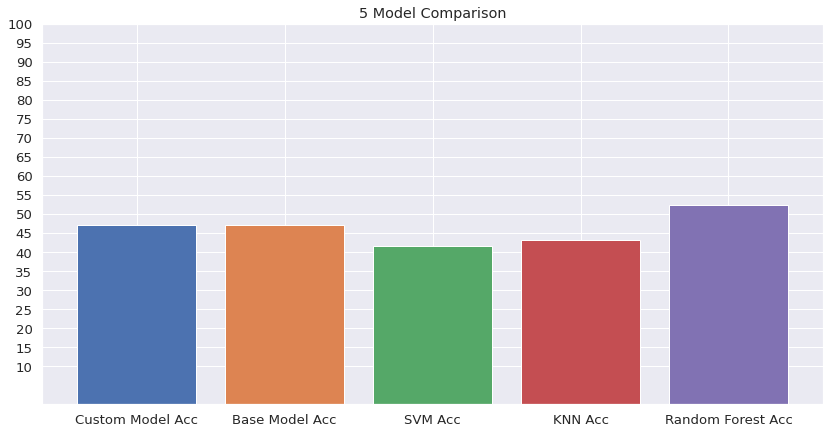

In [ ]:
plt.figure(figsize =(14,7))
plt.bar('Custom Model Acc',custom_model_accuracy)
plt.bar('Base Model Acc',base_model_accuracy)
plt.bar('SVM Acc',svm_accuracy)
plt.bar('KNN Acc',knn_accuracy)
plt.bar('Random Forest Acc',randomforest_accuracy)
plt.yticks([i for i in range(10,105,5)])
plt.title("5 Model Comparison")

plt.show()

### Random Forest Modelinin Sonuçlarının İncelenmesi

In [ ]:
val_predictions = ort_randomforest.predict(val_x)

pred = val_predictions[-20:].astype("int64")
org = val_y[-20:].values
df_pred = pd.DataFrame({"preds" : pred, "labels":org})
df_pred

,preds,labels
0,4,3
1,4,3
2,4,5
3,4,4
4,3,2
5,4,5
6,3,3
7,4,3
8,4,4
9,4,4


# Sadece ortalamalar ve lgs notu ile tahminleme

In [ ]:
df_not = df.iloc[:, -7:]
df_not.head()

,lgs_puani,ortaokul_puani,turkce9,mat9,ort9,ort10,ort11
0,377,93,2,2,3,4,4
1,393,80,2,1,3,4,4
2,390,90,4,5,4,5,1
3,378,80,2,1,3,3,3
4,394,86,4,2,3,4,4


In [ ]:
x = df_not.drop("ort11", axis=1)
y = df_not.ort11

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=42)

In [ ]:
model = DecisionTreeRegressor(max_depth=3)

model.fit(train_x, train_y)

val_predictions = model.predict(val_x)

print("Eğitim doğruluğu: ", model.score(train_x, train_y)*100)
print("Test doğruluğu: ", model.score(val_x, val_y)*100)

Eğitim doğruluğu:  18.49864395722176
Test doğruluğu:  -18.30784037208215


In [ ]:
XGB_model = XGBRegressor(min_child_weight=2,
                         max_depth=3,
                         subsample=0.6,
                         colsample_bytree=0.6,
                         n_estimators=500,
                         objective="reg:squarederror"
                         )
XGB_model.fit(train_x, train_y,
              early_stopping_rounds = 5,
              eval_set=[(val_x, val_y)],
              
              verbose=False)

predictions = XGB_model.predict(val_x)

print('Eğitim doğruluğu :',XGB_model.score(train_x,train_y)*100)
print('Test doğruluğu :',XGB_model.score(val_x,val_y)*100)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Eğitim doğruluğu : 46.72049754744027
Test doğruluğu : 20.405480934254882
Mean Absolute Error: 0.6268118558334689
